In [2]:
import s3fs
import pandas as pd

In [7]:
data_departement = pd.read_csv("https://minio.lab.sspcloud.fr/lgaliana/data/radio_cheptel_habitants.csv")

In [8]:
from cartiflette import carti_download
dep = carti_download(
    values=["France"],
    crs=4326,
    borders="DEPARTEMENT",
    vectorfile_format="geojson",
    filter_by="FRANCE_ENTIERE_DROM_RAPPROCHES",
    source="EXPRESS-COG-CARTO-TERRITOIRE",
    year=2022,
)

In [9]:
data_departement_geo = dep.merge(data_departement, left_on = "INSEE_DEP", right_on = "code")

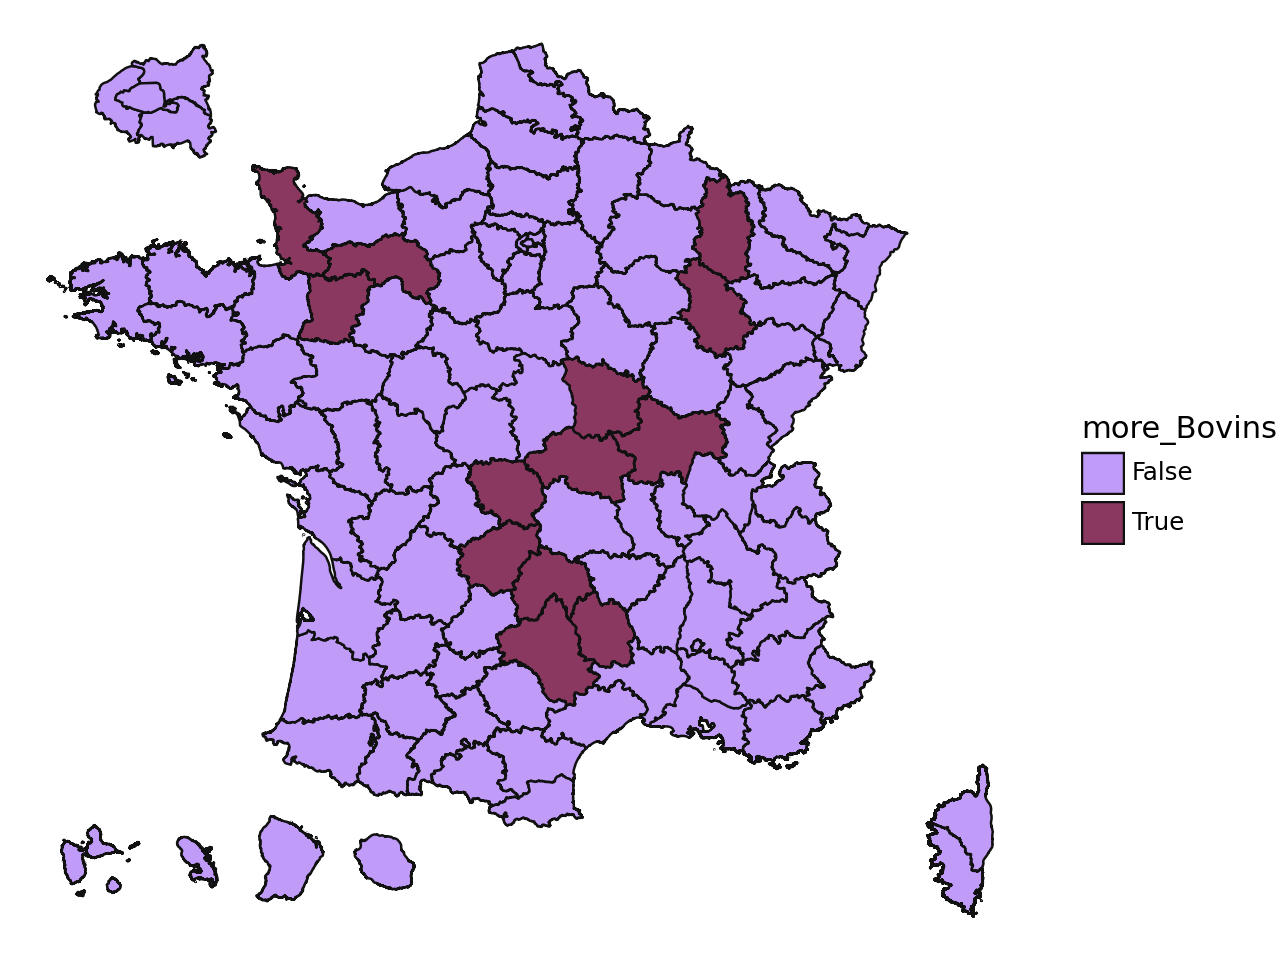

In [11]:
from plotnine import *

palettes = {
    "cate_blanchett": {True: "#9fcfe5", False: "#000000", "url": "https://twitter.com/claradealberto/status/1635310454628298753"},
    "angela_bassett": {True: "#8b3861", False: "#c09bf8", "url": "https://twitter.com/claradealberto/status/1635310457673371648"},
    "hong_chau": {True: "#d8929d", False: "#e4bcc4", "url": "https://twitter.com/claradealberto/status/1635310460840075266"}
}

(
    ggplot(data_departement_geo) +
    geom_map(aes(fill = "more_" + "Bovins")) +
    scale_fill_manual(values = palettes["angela_bassett"]) +
    theme_void()
)